#Student Name: 
#ECE 595 Machine Learning II
#Project 1: CLDNN - Student Code

In [3]:
#Import necessary packages
import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import cPickle

Using TensorFlow backend.


#Part 0: Importing and normalizing data

In [5]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)

#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)

4431872/4422102 [==============================] - 1s 0us/step


#Part 1: Plotting cross entropy

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


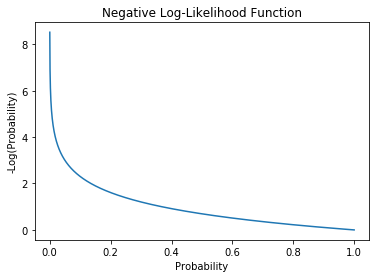

In [ ]:
#Show cross-entropy loss function

#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
import numpy as np
import matplotlib.pyplot as plt

prob = np.linspace(0, 1, num = 5000) #5000 evenly distributed points [0,1]
lgx = [-np.log(prob[i]) for i in range(len(prob))] #taking the negative log of each

plt.plot(prob, lgx)
plt.xlabel("Probability")
plt.ylabel("-Log(Probability)")
plt.title("Negative Log-Likelihood Function")

plt.show()

Answer the following questions:


1.   How is the the negative log-likelihood of p affected when p is small? How about when p is large?

  ANS: When P is very small, the negative log function saturates (i.e. the output is very large) and when p is very large, the function approaches 0.

2.   Why does the behavior of the negative log-likelihood function make it a good objective function for a minimization problem specifically when the output can be interpreted as a probability space?

  ANS: The log likelihood function is a good objective function for the minimization problem, as more probable events (p approaches 1) tend to signify the desired non-saturation of our gradient.  This is especially useful when the output is interpereted as a probability space, as this encourages higher probability models to succees in our gradient.




#Part 2: Overfit CNN

In [ ]:
#Create and train model architecture
def CNN_overfit():
    #Easiest way to build model in Keras is using Squential. It allows models to 
    #be built layer by layer as we will do here
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE

    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="softmax")) #output layer (10 perceptrons)

    return model

#Create instance of CNN model graph
CNN_overfit = CNN_overfit()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_overfit.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_overfit_mdata = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 10s 166us/step - loss: 0.0919 - accuracy: 0.1016 - val_loss: 0.0900 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 3s 53us/step - loss: 0.0848 - accuracy: 0.2092 - val_loss: 0.0791 - val_accuracy: 0.2826
Epoch 3/200
60000/60000 [==============================] - 3s 52us/step - loss: 0.0555 - accuracy: 0.5755 - val_loss: 0.0457 - val_accuracy: 0.6568
Epoch 4/200
60000/60000 [==============================] - 3s 53us/step - loss: 0.0440 - accuracy: 0.6706 - val_loss: 0.0385 - val_accuracy: 0.7171
Epoch 5/200
60000/60000 [==============================] - 3s 52us/step - loss: 0.0394 - accuracy: 0.7091 - val_loss: 0.0382 - val_accuracy: 0.7135
Epoch 6/200
60000/60000 [==============================] - 3s 52us/step - loss: 0.0370 - accuracy: 0.7264 - val_loss: 0.0361 - val_accuracy: 0.7479
Epoch 7/200
60000/60000 [==============================] - 3

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


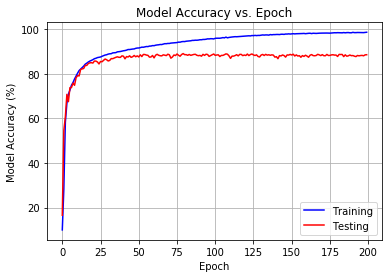

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

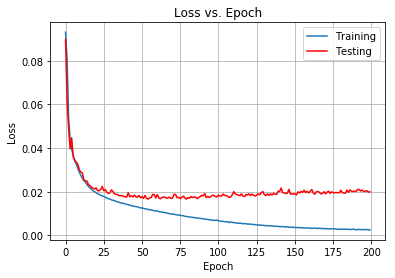

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['loss'], label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of the training set goes to 0 as the number of epochs increases

2.   What does the loss of the testing set go to? 

  ANS: The loss of the testing set appears to go to 0.02 as the number of epochs increases
  
3.   What is the reason for the discrepancy between the training and testing set loss? 

  ANS:  The network is generated through the training set of data, and the testing set will never be identical to the training set, so there will always be a discrepancy even for a great model. (no free lunch theorem)

4.   Explain why the accuracy of the testing set, after training, differs so much from the testing set regardless of achieving high training accuracy. Name two ways to avoid this. 

  ANS: Similar to the answer in question 3, the model will be able to predict with the training set very well after many epochs, but the testing set will always differ from training, and could have different patters/outliers not included in training.

#Part 3: Dropout on input layer

In [ ]:
#Create and train model architecture
def CNN_dropout_in():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="softmax")) #output layer (10 perceptrons)
    
    return model

#Create instance of CNN model graph
CNN_dropout_in = CNN_dropout_in()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_in.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_in_mData = CNN_dropout_in.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_dropout_in.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 178us/step - loss: 0.0939 - accuracy: 0.1008 - val_loss: 0.0902 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.0863 - accuracy: 0.1916 - val_loss: 0.0771 - val_accuracy: 0.2928
Epoch 3/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.0585 - accuracy: 0.5427 - val_loss: 0.0566 - val_accuracy: 0.5471
Epoch 4/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.0458 - accuracy: 0.6544 - val_loss: 0.0455 - val_accuracy: 0.6598
Epoch 5/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.0405 - accuracy: 0.6977 - val_loss: 0.0383 - val_accuracy: 0.7008
Epoch 6/200
60000/60000 [==============================] - 11s 175us/step - loss: 0.0380 - accuracy: 0.7196 - val_loss: 0.0399 - val_accuracy: 0.7045
Epoch 7/200
60000/60000 [=========================

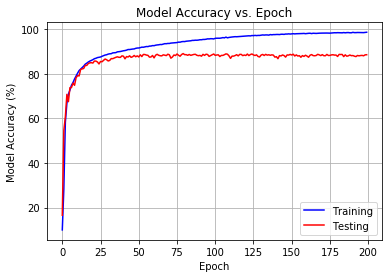

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, [i*100 for i in CNN_overfit_mdata.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

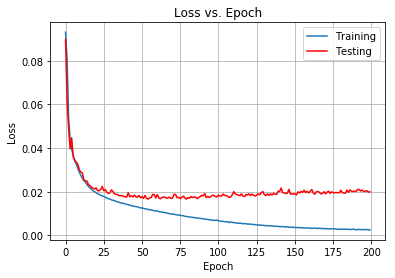

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['loss'], label="Training")
b = plt.plot(CNN_overfit_mdata.epoch, CNN_overfit_mdata.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions: 



1.   What does the loss of the training set go to? 

  ANS: The loss of training goes to 0.
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of testing goes to roughly 0.02.

3.   Why is the loss of the training set so different from the loss of the testing set regardless of using dropout? 

  ANS:  Because regardless of the datasets, the training dataset will have discrepancies from the testing set, and this will lead to nonzero loss for the model.  The only scenario where testing and training loss are the same are if the two sets of data are virtually the same.

#Part 4-I: Dropout on Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_hidden():
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="softmax")) #output layer (10 perceptrons)

    return model

#Create instance of CNN model graph
CNN_dropout_hidden = CNN_dropout_hidden()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_hidden.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])
#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_hidden_mData = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 185us/step - loss: 0.0986 - accuracy: 0.1011 - val_loss: 0.0901 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0895 - accuracy: 0.1255 - val_loss: 0.0863 - val_accuracy: 0.1944
Epoch 3/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0657 - accuracy: 0.4646 - val_loss: 0.0581 - val_accuracy: 0.5928
Epoch 4/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0469 - accuracy: 0.6435 - val_loss: 0.0457 - val_accuracy: 0.6709
Epoch 5/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0411 - accuracy: 0.6951 - val_loss: 0.0418 - val_accuracy: 0.7050
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0384 - accuracy: 0.7147 - val_loss: 0.0387 - val_accuracy: 0.7119
Epoch 7/200
60000/60000 [=========================

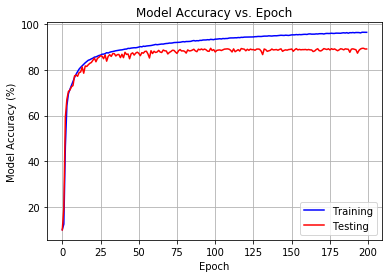

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_hidden_mData.epoch, [i*100 for i in CNN_dropout_hidden_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_hidden_mData.epoch, [i*100 for i in CNN_dropout_hidden_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

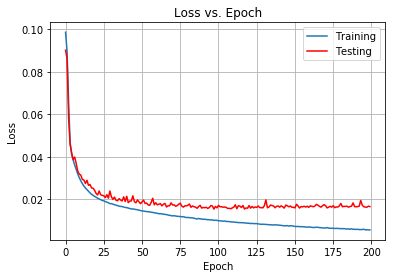

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_hidden_mData.epoch, CNN_dropout_hidden_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_hidden_mData.epoch, CNN_dropout_hidden_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions:



1.   What does the loss of the training set go to? 

  ANS: The loss of this training set trends to 0.
  
2.   What does the loss of the testing set go to? 

  ANS: The loss of testing is slightly lesser than previous models, going to about 0.016.

3.   Why was using dropout more effective here in comparison to the architecture in Part 3? 

  ANS: In adding another layer of dropout, nodes are ignored in a given epoch, which allows for the possibility of overfitting to be reduced.  This dropout allows for the model to be more generalized, and thus allows for a better model when applied to the testing set.
  
4.   What is the difference in accuracy, after training, between the training and testing set? Is the model a good fit for the data? 

  ANS: The training set is around 6-7% greater than the testing set.  Given that the testing set's accuracy trended to 90% with more epochs, this would be a good fit for the data.

#Part 4-II [Sub-Question 5]: Dropout on Input and Hidden Layers

In [ ]:
#Create and train model architecture
def CNN_dropout_both():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Dropout(0.30)) #30% dropout
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="softmax")) #output layer (10 perceptrons)

    return model


#Create instance of CNN model graph
CNN_dropout_both = CNN_dropout_both()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_mData = CNN_dropout_both.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_dropout_both.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 185us/step - loss: 0.0977 - accuracy: 0.0999 - val_loss: 0.0901 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0899 - accuracy: 0.1110 - val_loss: 0.0895 - val_accuracy: 0.1251
Epoch 3/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0730 - accuracy: 0.3913 - val_loss: 0.0591 - val_accuracy: 0.6398
Epoch 4/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0520 - accuracy: 0.6034 - val_loss: 0.0492 - val_accuracy: 0.6521
Epoch 5/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0452 - accuracy: 0.6615 - val_loss: 0.0455 - val_accuracy: 0.6571
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0424 - accuracy: 0.6845 - val_loss: 0.0427 - val_accuracy: 0.7032
Epoch 7/200
60000/60000 [=========================

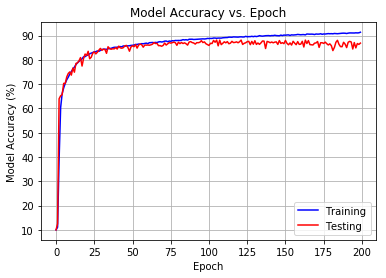

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_mData.epoch, [i*100 for i in CNN_dropout_both_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_mData.epoch, [i*100 for i in CNN_dropout_both_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

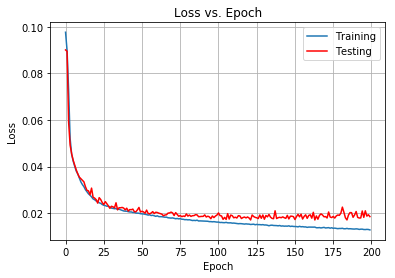

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_mData.epoch, CNN_dropout_both_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_mData.epoch, CNN_dropout_both_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions: 

1.   What does the loss of the training set go to? 

  ANS: 0
  
2.   What does the loss of the testing set go to? 

  ANS: 0.018
  
3.   What is the difference in accuracy, after training, between the training and testing set?  

  ANS: Training tends to be 4-5% better than the testing set

4.   Compare results in 4 with results in 5. Comment on robustness and accuracy.

  ANS:  The loss in this network though similar to the previous network is much more noisy which means less consistent learning in this network.  As for accuracy, this network has a much smaller error difference between testing and training than the previous network, however the average accuracy is lesser in this network than the previous network.

#Part 5 : Activation Functions - (sigmoid activation)

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    model.add(Dropout(0.30)) #30% dropout
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="sigmoid")) #output layer (10 perceptrons)

    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both_act.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_act_mData = CNN_dropout_both_act.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_dropout_both_act.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 185us/step - loss: 0.1085 - accuracy: 0.1011 - val_loss: 0.0956 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0914 - accuracy: 0.1017 - val_loss: 0.0941 - val_accuracy: 0.1000
Epoch 3/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0907 - accuracy: 0.1089 - val_loss: 0.0955 - val_accuracy: 0.3020
Epoch 4/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0842 - accuracy: 0.2616 - val_loss: 0.0805 - val_accuracy: 0.4071
Epoch 5/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0667 - accuracy: 0.4709 - val_loss: 0.0600 - val_accuracy: 0.6189
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0553 - accuracy: 0.5921 - val_loss: 0.0592 - val_accuracy: 0.5716
Epoch 7/200
60000/60000 [=========================

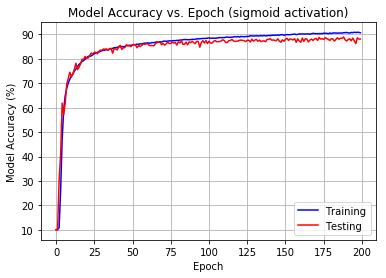

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

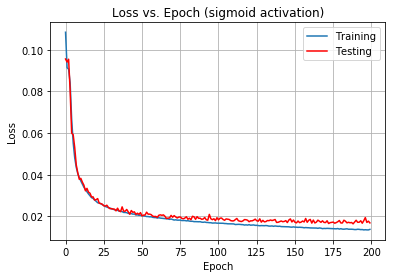

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

#Part 5 : Activation Functions - (sigmoid activation)

In [ ]:
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    #FILL THIS IN WITH MODEL ARCHITECTURE   # use 'sigmoid' for point 1 and use 'tanh' for point 2
    model.add(Dropout(0.30)) #30% dropout
    model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 1 (256 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)) #hidden layer 2 (2x2 max-pooling)
    model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #hidden layer 3 (128 fmaps, 3 x 3 filter)
    model.add(Dropout(0.30)) #30% dropout
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))#hidden layer 4 (2x2 max-pooling)
    model.add(Flatten()) #hidden layer 5 (layer to flatten data)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 6 (dense, 100 perceptrons)
    model.add(Dense(100, activation="relu", kernel_initializer="normal")) #hidden layer 7 (dense, 100 perceptrons)
    model.add(Dense(10, activation="tanh")) #output layer (10 perceptrons)

    return model


#Create instance of CNN model graph
CNN_dropout_both_act = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
CNN_dropout_both_act.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])

#Train the model and assign training meta-data to a variable
#FILL THIS IN
CNN_dropout_both_act_mData = CNN_dropout_both_act.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = CNN_dropout_both_act.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 11s 184us/step - loss: 0.2574 - accuracy: 0.1022 - val_loss: 0.0915 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0918 - accuracy: 0.1028 - val_loss: 0.0908 - val_accuracy: 0.1000
Epoch 3/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0906 - accuracy: 0.1289 - val_loss: 0.0898 - val_accuracy: 0.1029
Epoch 4/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0802 - accuracy: 0.3355 - val_loss: 0.0721 - val_accuracy: 0.5437
Epoch 5/200
60000/60000 [==============================] - 11s 181us/step - loss: 0.0649 - accuracy: 0.5211 - val_loss: 0.0682 - val_accuracy: 0.4532
Epoch 6/200
60000/60000 [==============================] - 11s 182us/step - loss: 0.0567 - accuracy: 0.5874 - val_loss: 0.0545 - val_accuracy: 0.6373
Epoch 7/200
60000/60000 [=========================

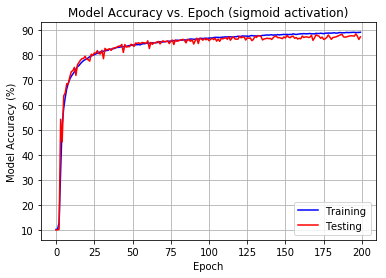

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, [i*100 for i in CNN_dropout_both_act_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

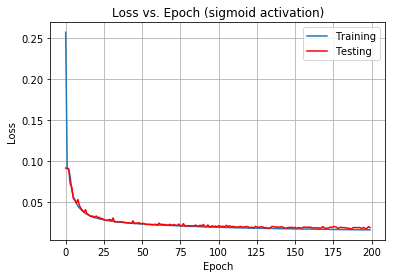

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['loss'], label="Training")
b = plt.plot(CNN_dropout_both_act_mData.epoch, CNN_dropout_both_act_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions: 

1-c.   Compare the above results with softmax results (with point 5 results of Part 4-II)

  ANS: Comparing to the output of softmax, the tanh testing accuracy is much more noisy, and the training loss of tanh starts off at a value that is 4 times larger than that of softmax.
  
2-a.   Does ‘tanh’ as output activation work with Cross-entropy loss?

  ANS: The tanh function does not typically work with cross-entropy loss

2-b.   Give a reason why tanh is not recommended with cross entropy loss?

  ANS: The output range of tanh is [-1, 1], however the cross entropy loss function expects an input of [0, 1].

2-c.   Give a reason why sigmoid does not cause problem as tanh with Cross entropy loss?

  ANS: As mentioned above, the cross entropy function expects an input of [0, 1].  Tanh outputs values that may not be contained within this range, however the sigmoid function outputs values only within this range, causing it to be a perfect match. 


#Part 6: Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'))
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

--2020-09-20 19:00:49--  http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
Resolving opendata.deepsig.io (opendata.deepsig.io)... 52.14.91.165
Connecting to opendata.deepsig.io (opendata.deepsig.io)|52.14.91.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1245608913 (1.2G) [application/x-bzip2]
Saving to: ‘RML2016.10b.tar.bz2’

RML2016.10b.tar.bz2 100%[===================>]   1.16G   872KB/s    in 38m 0s  

2020-09-20 19:38:49 (534 KB/s) - ‘RML2016.10b.tar.bz2’ saved [1245608913/1245608913]

RML2016.10b.dat
LICENSE.TXT


In [ ]:
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    #FILL THIS IN WITH MODEL ARCHITECTURE
    model.add(Conv2D(256, (1, 3), activation='sigmoid', input_shape=(28, 28, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (2, 3), activation='sigmoid'))    
    model.add(Conv2D(80, (1, 3), activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Conv2D(80, (1, 3), activation='sigmoid'))
    #model.summary()
    model.add(Reshape((-1,96)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(128, activation="relu", kernel_initializer="normal"))
    model.add(Dense(10, activation="relu", kernel_initializer="normal"))

    return model

#Create instance of CNN model graph
cldnn = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
#FILL THIS IN
cldnn.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['accuracy'])


#Train the model and assign training meta-data to a variable
#FILL THIS IN
cldnn_mData = cldnn.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1024, shuffle=True)

#Print accuracy of model on testing set after training 
#FILL THIS IN
scores = cldnn.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0914 - accuracy: 0.0990 - val_loss: 0.0911 - val_accuracy: 0.1000
Epoch 2/200
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0911 - accuracy: 0.1018 - val_loss: 0.0911 - val_accuracy: 0.1000
Epoch 3/200
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0911 - accuracy: 0.0989 - val_loss: 0.0911 - val_accuracy: 0.1000
Epoch 4/200
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0911 - accuracy: 0.0994 - val_loss: 0.0911 - val_accuracy: 0.1000
Epoch 5/200
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0910 - accuracy: 0.0989 - val_loss: 0.0910 - val_accuracy: 0.1000
Epoch 6/200
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0910 - accuracy: 0.0995 - val_loss: 0.0910 - val_accuracy: 0.1000
Epoch 7/200
60000/60000 [==============================] - 65s

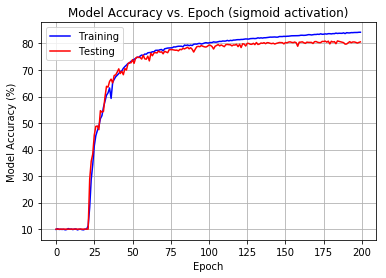

In [ ]:
#Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(cldnn_mData.epoch, [i*100 for i in cldnn_mData.history['accuracy']], color='blue', label="Training")
b = plt.plot(cldnn_mData.epoch, [i*100 for i in cldnn_mData.history['val_accuracy']], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Model Accuracy (%)")
plt.title("Model Accuracy vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

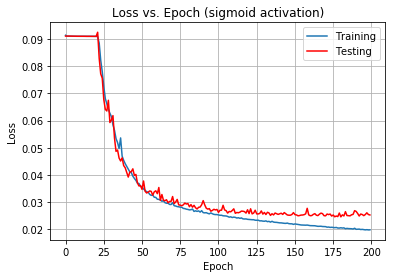

In [ ]:
#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
a = plt.plot(cldnn_mData.epoch, cldnn_mData.history['loss'], label="Training")
b = plt.plot(cldnn_mData.epoch, cldnn_mData.history['val_loss'], color='red', label="Testing")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch (sigmoid activation)")
plt.legend(loc="best")
plt.grid('on')

plt.show()

Answer the following questions: 



1.   Is this model a good fit for the data?  

  ANS: In assesing this, I would say that this is a fairly good model fit for the data.  Referring to the plot of accuracy vs epochs, the model reaches accuracy of 80% near the end of the epochs, though it is worth noting that this may not be the most successful model for this data.

2.   Give two ways to improve the robustness of the model.

  ANS: Of the many ways we can improve the robustness of this model, two possible methods are 1) Implementing noise injection to the data, and 2) Increasing dropout percentages/amounts of dropout in the model.  With 1, this allows for originally noisy data to be more properly accounted for, and with 2, this allows for better performance that relies on less nodes, increasing the overall performance of lesser nodes.